In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
brain = pd.read_csv('headbrain.csv')
brain.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [7]:
brain.shape

(237, 4)

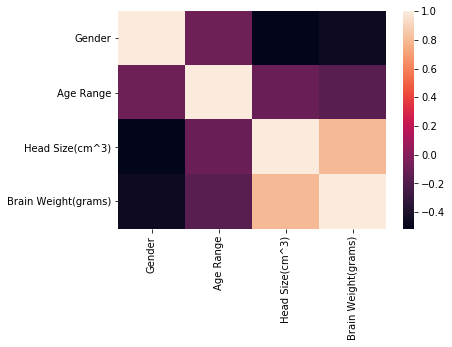

In [8]:
sns.heatmap(brain.corr())

In [14]:
X = brain['Head Size(cm^3)'].values
Y = brain['Brain Weight(grams)'].values

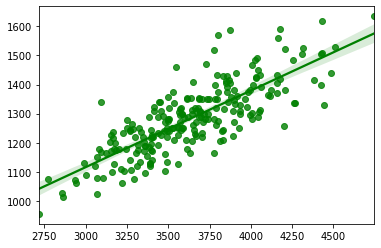

In [34]:
sns.regplot(X, Y, data=brain, color='green')

In [15]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

numer = 0
denom = 0
for i in range(m):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.26342933948939945 325.57342104944223


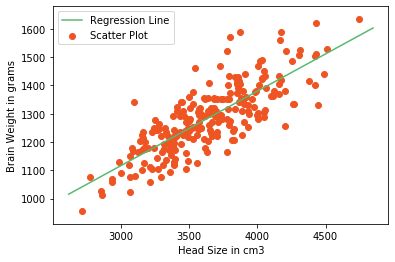

In [16]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [17]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0+b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
a = len(X_train)
X_train = X_train.reshape(a,1)
b = len(Y_train)
Y_train = Y_train.reshape(b,1)
c = len(X_test)
X_test = X_test.reshape(c,1)
d = len(Y_test)
Y_test = Y_test.reshape(d,1)
reg = LinearRegression()
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)
r2_score(Y_test, y_pred)

0.6376364238008985

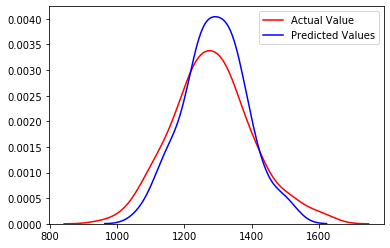

In [27]:
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [28]:
from sklearn.externals import joblib
joblib.dump(reg, 'regressionmodel1.joblib')

['regressionmodel1.joblib']

In [29]:
from sklearn.externals import joblib
model = joblib.load('regressionmodel1.joblib')
prediction = model.predict([[3500]])
prediction


array([[1248.00285142]])